# Peer, Claire, Elena

In [1]:
import pandas as pd
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix,
                            f1_score, balanced_accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
val_data_c = pd.read_csv("data/c_labeled_2cat.csv")
val_data_c.drop(columns = ["Unnamed: 0.4", "Unnamed: 0.3", "Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], inplace = True)
val_data_c['label_c'] = val_data_c['label'].map(lambda x: 'disagree' if x =="A" else 'no_disagreement') # label app swiched labels accidentially, so re-switch here
#val_data_c

In [5]:
val_data_e = pd.read_excel("data/labeled_E_2cat.xlsx")
val_data_e.drop(columns = ["index"], inplace = True)
val_data_e.rename(columns = {"label": "label_e"}, inplace = True)
#val_data_e

In [6]:
val_data_p = pd.read_csv("data/labeled_P.csv")
val_data_p.drop(columns = ["Unnamed: 0.9", "Unnamed: 0.8", "Unnamed: 0.7", "Unnamed: 0.6", "Unnamed: 0.5", "Unnamed: 0.4", "Unnamed: 0.3", "Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], inplace = True)
val_data_p.rename(columns = {"label": "label_p"}, inplace = True)

In [7]:
val_data = val_data_e.merge(val_data_c[["msg_id_parent", "msg_id_child", "label_c"]], on = ["msg_id_parent", "msg_id_child"])
val_data = val_data.merge(val_data_p[["msg_id_parent", "msg_id_child", "label_p"]], on = ["msg_id_parent", "msg_id_child"], how = "left")
val_data


,submission_id,msg_id_parent,msg_id_child,submission_text,body_parent,body_child,subreddit,label_e,label_c,label_p
0,8we2i8,e2gbshk,e2go5cs,So walkaway has gone viral whatever that means...,"If it's incredibly fake, the people leaving th...",I've talked to a lot of Bernie supporters on R...,Ask_Politics,disagree,no_disagreement,disagree
1,17p478l,k8h1qxn,k8ivjmx,Question in a state like Mississippi thats oft...,You talk like Mississippi has the same infrast...,"Wow lol, was it that obvious that I'm from New...",Askpolitics,no_disagreement,disagree,no_disagreement
2,181o366,kaf8us2,kahj2cn,"In the United States, there is a lot about wha...",We need to read more classic literature,May I ask what you consider the classics?,PoliticalDebate,no_disagreement,no_disagreement,no_disagreement
3,18rqy2g,kf37doz,kf54umb,Federal Revenue FY 2022 Budget -- Income Taxe...,Everything the government does that isnt makin...,So you would immediately remove Medicare and S...,PoliticalDebate,no_disagreement,disagree,disagree
4,4dgyfc,d1qsqkm,d1r17xo,"In an appearance on CNN's New Day, Jeff Weaver...",Funny math It's still math. It's unlikely that...,Weaver is playing cute with the super delegate...,PoliticalDiscussion,no_disagreement,disagree,no_disagreement
5,18fxb9q,kd28j8o,kdb3j9u,Milei has promised shock therapy as a way to a...,Why would he reduce capital expenditures or bl...,Argentinian government debt is basically worth...,PoliticalDiscussion,no_disagreement,no_disagreement,disagree
6,"""xqo2u""","""c5or5ik""","""c5p0n4r""","""Truth be told, it's not any individual's faul...","""You folks will enjoy r.politics much more whe...","""Same thing is on - it takes you an hour to g...","""politics""",no_disagreement,no_disagreement,no_disagreement
7,17phvl2,k87wrac,k89o4tn,There's a lot going on in the right now that h...,"IMHO Republicans will gain seats in the House,...",Republicans are showing they can govern. I don...,PoliticalDebate,disagree,disagree,disagree
8,"""2p7xdk""","""cmu9elu""","""cmuk9pu""","""I'm sure you could have always found 20 of th...","""The American Right has perpetrated this, thro...","""Play spot the Fasci next time you're looking ...","""politics""",no_disagreement,no_disagreement,disagree
9,1ov3n2,ccw1rty,ccw2pn9,This fascinating article about a recent Yale s...,I don't find this particularly disturbing and ...,To add to what you said and expand on the arti...,NeutralPolitics,no_disagreement,no_disagreement,no_disagreement


In [8]:
inter_coder_agree = len(val_data[val_data['label_c'] == val_data['label_e']][val_data['label_p'] == val_data['label_e']]) / len(val_data)
print(inter_coder_agree)

len(val_data[val_data['label_c'] == val_data['label_e']][val_data['label_p'] == val_data['label_e']])

0.5666666666666667


/tmp/ipykernel_1013/3078761181.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_coder_agree = len(val_data[val_data['label_c'] == val_data['label_e']][val_data['label_p'] == val_data['label_e']]) / len(val_data)
/tmp/ipykernel_1013/3078761181.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(val_data[val_data['label_c'] == val_data['label_e']][val_data['label_p'] == val_data['label_e']])


34

In [9]:
# Apply mode across the rows
# Peer: two labels missing, but C and E agree on that anyways

val_data['majority_label'] = val_data[['label_e', 'label_c', 'label_p']].mode(axis=1)[0]
val_data

,submission_id,msg_id_parent,msg_id_child,submission_text,body_parent,body_child,subreddit,label_e,label_c,label_p,majority_label
0,8we2i8,e2gbshk,e2go5cs,So walkaway has gone viral whatever that means...,"If it's incredibly fake, the people leaving th...",I've talked to a lot of Bernie supporters on R...,Ask_Politics,disagree,no_disagreement,disagree,disagree
1,17p478l,k8h1qxn,k8ivjmx,Question in a state like Mississippi thats oft...,You talk like Mississippi has the same infrast...,"Wow lol, was it that obvious that I'm from New...",Askpolitics,no_disagreement,disagree,no_disagreement,no_disagreement
2,181o366,kaf8us2,kahj2cn,"In the United States, there is a lot about wha...",We need to read more classic literature,May I ask what you consider the classics?,PoliticalDebate,no_disagreement,no_disagreement,no_disagreement,no_disagreement
3,18rqy2g,kf37doz,kf54umb,Federal Revenue FY 2022 Budget -- Income Taxe...,Everything the government does that isnt makin...,So you would immediately remove Medicare and S...,PoliticalDebate,no_disagreement,disagree,disagree,disagree
4,4dgyfc,d1qsqkm,d1r17xo,"In an appearance on CNN's New Day, Jeff Weaver...",Funny math It's still math. It's unlikely that...,Weaver is playing cute with the super delegate...,PoliticalDiscussion,no_disagreement,disagree,no_disagreement,no_disagreement
5,18fxb9q,kd28j8o,kdb3j9u,Milei has promised shock therapy as a way to a...,Why would he reduce capital expenditures or bl...,Argentinian government debt is basically worth...,PoliticalDiscussion,no_disagreement,no_disagreement,disagree,no_disagreement
6,"""xqo2u""","""c5or5ik""","""c5p0n4r""","""Truth be told, it's not any individual's faul...","""You folks will enjoy r.politics much more whe...","""Same thing is on - it takes you an hour to g...","""politics""",no_disagreement,no_disagreement,no_disagreement,no_disagreement
7,17phvl2,k87wrac,k89o4tn,There's a lot going on in the right now that h...,"IMHO Republicans will gain seats in the House,...",Republicans are showing they can govern. I don...,PoliticalDebate,disagree,disagree,disagree,disagree
8,"""2p7xdk""","""cmu9elu""","""cmuk9pu""","""I'm sure you could have always found 20 of th...","""The American Right has perpetrated this, thro...","""Play spot the Fasci next time you're looking ...","""politics""",no_disagreement,no_disagreement,disagree,no_disagreement
9,1ov3n2,ccw1rty,ccw2pn9,This fascinating article about a recent Yale s...,I don't find this particularly disturbing and ...,To add to what you said and expand on the arti...,NeutralPolitics,no_disagreement,no_disagreement,no_disagreement,no_disagreement


In [10]:
def get_counts_and_shares(df, column):

    return df[column].value_counts().to_frame('Count').join(df[column].value_counts(normalize=True).to_frame('%')).reset_index()


In [11]:
get_counts_and_shares(val_data, 'label_e')

,label_e,Count,%
0,no_disagreement,47,0.783333
1,disagree,13,0.216667


In [12]:
get_counts_and_shares(val_data, 'label_c')

,label_c,Count,%
0,no_disagreement,34,0.566667
1,disagree,26,0.433333


In [13]:
get_counts_and_shares(val_data, 'label_p')

,label_p,Count,%
0,no_disagreement,34,0.586207
1,disagree,24,0.413793


In [14]:
get_counts_and_shares(val_data, 'majority_label')

,majority_label,Count,%
0,no_disagreement,39,0.65
1,disagree,21,0.35


In [15]:
def get_valid_share_and_performance(df, true_col, pred_col, valid_responses):

    share = len(df[df[pred_col].isin(valid_responses)]) / len(df)
    print("Valid Share of Responses: ", share)

    valid_df = df[df[pred_col].isin(valid_responses)]

    # performance
    y_test = valid_df[true_col]
    y_pred = valid_df[pred_col]
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

 
    #return valid_df


valid_responses_2 = ['disagree', 'no_disagreement']
valid_responses_3 = ['disagree', 'agree', 'neutral']

In [16]:
def print_cm(axis, df, true_col, pred_col, title):
    print(df[true_col].value_counts())
    
    cm = confusion_matrix(df[true_col], df[pred_col])
    labels = sorted(set(df[true_col]).union(set(df[pred_col])))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=axis)
    
    axis.set_xlabel("Predicted Labels")
    axis.set_ylabel("True Labels")
    axis.set_title(title)

Valid Share of Responses:  1.0
Confusion Matrix:
[[ 9  4]
 [17 30]]

Classification Report:
                 precision    recall  f1-score   support

       disagree       0.35      0.69      0.46        13
no_disagreement       0.88      0.64      0.74        47

       accuracy                           0.65        60
      macro avg       0.61      0.67      0.60        60
   weighted avg       0.77      0.65      0.68        60

Balanced Accuracy Score: 0.6653027823240589
Accuracy Score: 0.65
label_e
no_disagreement    47
disagree           13
Name: count, dtype: int64


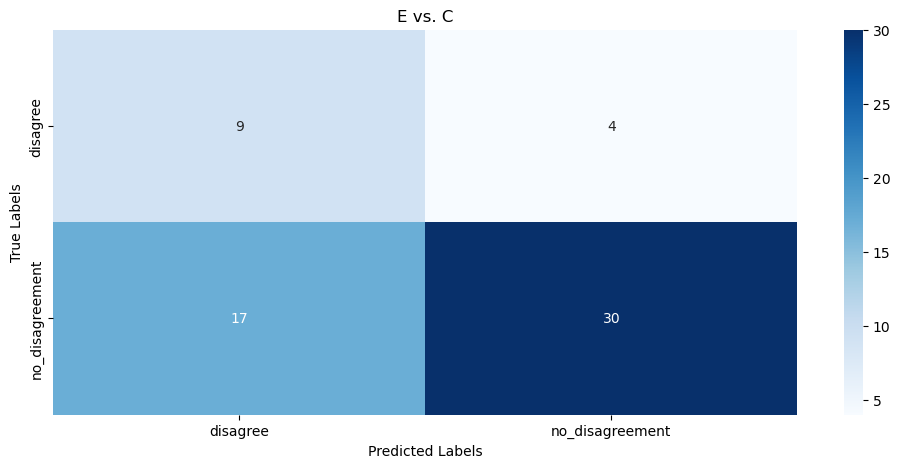

In [17]:
# Claire vs. Elena
get_valid_share_and_performance(val_data, 'label_e', 'label_c', valid_responses_2)


fig, axes = plt.subplots(1, 1, figsize=(12, 5))  

print_cm(
    axis=axes,
    df = val_data,
    true_col = "label_e",
    pred_col = "label_c",
    title='E vs. C'
)

Valid Share of Responses:  0.9666666666666667
Confusion Matrix:
[[17  9]
 [ 7 25]]

Classification Report:
                 precision    recall  f1-score   support

       disagree       0.71      0.65      0.68        26
no_disagreement       0.74      0.78      0.76        32

       accuracy                           0.72        58
      macro avg       0.72      0.72      0.72        58
   weighted avg       0.72      0.72      0.72        58

Balanced Accuracy Score: 0.7175480769230769
Accuracy Score: 0.7241379310344828
label_c
no_disagreement    32
disagree           26
Name: count, dtype: int64


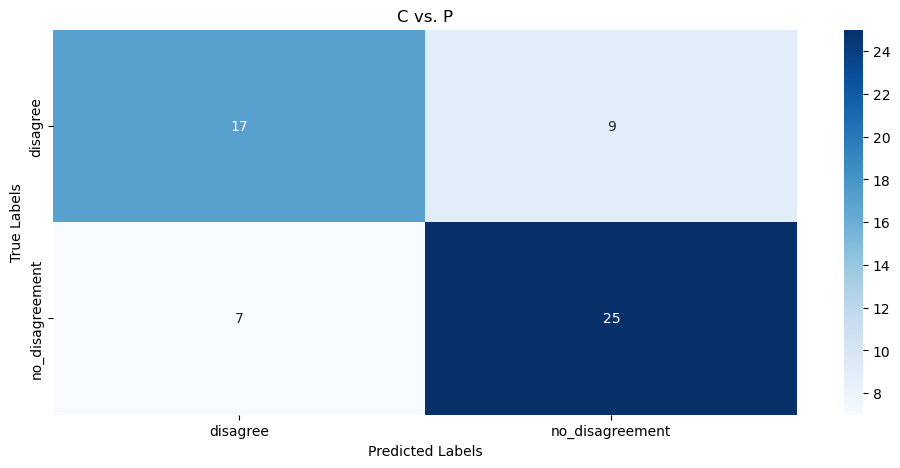

In [18]:
# Claire vs. Peer
get_valid_share_and_performance(val_data, 'label_c', 'label_p', valid_responses_2)

fig, axes = plt.subplots(1, 1, figsize=(12, 5))  
plt_val_data = val_data[val_data['label_p'].isin(["disagree", "no_disagreement"])]

print_cm(
    axis=axes,
    df = plt_val_data,
    true_col = "label_c",
    pred_col = "label_p",
    title='C vs. P'
)

Valid Share of Responses:  0.9666666666666667
Confusion Matrix:
[[13  0]
 [11 34]]

Classification Report:
                 precision    recall  f1-score   support

       disagree       0.54      1.00      0.70        13
no_disagreement       1.00      0.76      0.86        45

       accuracy                           0.81        58
      macro avg       0.77      0.88      0.78        58
   weighted avg       0.90      0.81      0.83        58

Balanced Accuracy Score: 0.8777777777777778
Accuracy Score: 0.8103448275862069
label_e
no_disagreement    45
disagree           13
Name: count, dtype: int64


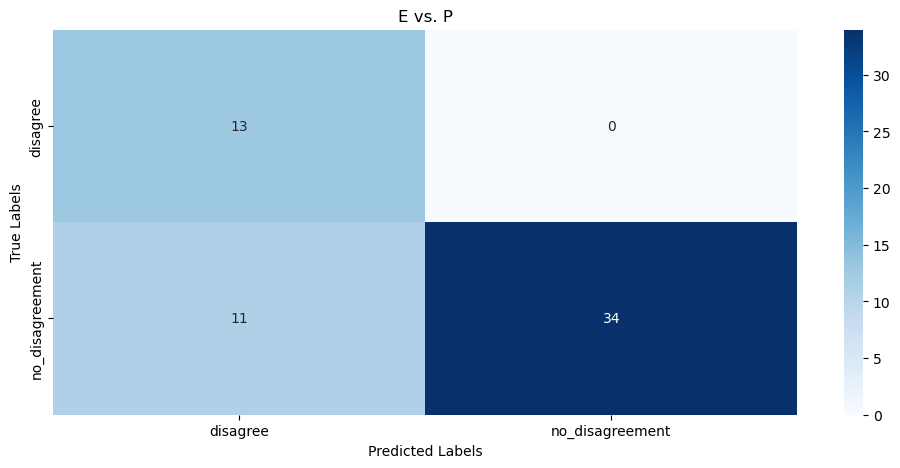

In [19]:
# Peer vs. Elena
get_valid_share_and_performance(val_data, 'label_e', 'label_p', valid_responses_2)

fig, axes = plt.subplots(1, 1, figsize=(12, 5))  
plt_val_data = val_data[val_data['label_p'].isin(["disagree", "no_disagreement"])]

print_cm(
    axis=axes,
    df = plt_val_data,
    true_col = "label_e",
    pred_col = "label_p",
    title='E vs. P'
)

In [20]:
val_data.to_csv("data/majority_validation.csv", index = False)